# News API Data Visualization

In [1]:
import numpy as np
import json
import pandas as pd
import bokeh.plotting as bk
import datetime as dt
# hover pan, zoom, reset, lables, etc tools
from bokeh.models import HoverTool, Label, BoxZoomTool, PanTool, ZoomInTool, ZoomOutTool, ResetTool
import requests

In [2]:
data = [{'source': 'ABC News', 'dom_tone': 'Analytical', 'title': 'Straight-A student stabbed to death in school by classmate, possibly in love triangle: Police', 'date_created': '2018-09-12T11:43:21.421765+00:00', 'url': 'https://abcnews.go.com/US/teen-fatally-stabs-fellow-student-apparent-high-school/story?id=57773955', 'id': 1, 'image': 'https://s.abcnews.com/images/US/breaking-news-graphic1-abc-ml-171211_16x9_992.jpg', 'description': 'A high school love triangle apparently triggered a fatal classroom stabbing in Michigan on Wednesday morning, police said.', 'date_updated': '2018-09-12T11:43:21.421789+00:00', 'date_published': None}, {'source': 'The New York Times', 'dom_tone': 'Tentative', 'title': "Hurricane Florence Live Updates: Catastrophic Rain Predicted as Storm's Path Shifts", 'date_created': '2018-09-12T11:43:21.421765+00:00', 'url': 'https://www.nytimes.com/2018/09/12/us/hurricane-florence.html', 'id': 2, 'image': 'https://static01.nyt.com/images/2018/09/13/us/13FLORENCE-livebrief-02/merlin_143636370_d57dab00-b1ad-444d-87df-40f24f42ec0d-facebookJumbo.jpg', 'description': 'Forecasters warned that the Category 3 storm might produce catastrophic flooding and rain in a larger swath of the coast and farther inland than previously predicted.', 'date_updated': '2018-09-12T11:43:21.421789+00:00', 'date_published': None}, {'source': 'ABC News', 'dom_tone': 'Analytical', 'title': "'60 Minutes' executive producer out at CBS over allegations", 'date_created': '2018-09-12T11:43:21.421765+00:00', 'url': 'https://abcnews.go.com/Entertainment/wireStory/60-minutes-chief-fager-cbs-57777435', 'id': 3, 'image': 'https://s.abcnews.com/images/Entertainment/WireAP_f354fbd97b5246ef9df8f556cdf42c5e_16x9_992.jpg', 'description': 'Get breaking national and world news, broadcast video coverage, and exclusive interviews. Find the top news online at ABC news.', 'date_updated': '2018-09-12T11:43:21.421789+00:00', 'date_published': None}, {'source': 'CNN', 'dom_tone': 'Tentative', 'title': 'Trump signs measure punishing election interference', 'date_created': '2018-09-12T11:43:21.421765+00:00', 'url': 'https://www.cnn.com/2018/09/12/politics/trump-election-meddling-executive-order/index.html', 'id': 4, 'image': 'https://cdn.cnn.com/cnnnext/dam/assets/180727091704-02-trump-putin-super-tease.jpg', 'description': "President Donald Trump signed an executive order on Wednesday meant to punish foreign entities for interfering in US elections, an attempt to demonstrate muscle on an issue he's been accused of downplaying.", 'date_updated': '2018-09-12T11:43:21.421789+00:00', 'date_published': None}, {'source': 'The New York Times', 'dom_tone': 'Tentative', 'title': 'Apple Event Live Updates: The Biggest-Ever iPhone, With a Mouthful of a Name', 'date_created': '2018-09-12T11:43:21.421765+00:00', 'url': 'https://www.nytimes.com/2018/09/12/technology/apple-event-live-iphone-watch-ios12.html', 'id': 5, 'image': 'https://static01.nyt.com/images/2018/09/12/multimedia/apple-product-launch-57/apple-product-launch-57-facebookJumbo.jpg', 'description': 'Apple is hosting its annual unveiling of new smartphones, and announced an upgrade to its smart watches that makes them more of a health device.', 'date_updated': '2018-09-12T11:43:21.421789+00:00', 'date_published': None}, {'source': 'The Verge', 'dom_tone': 'Joy', 'title': 'Apple Watch Series 4 includes a bigger display and new design', 'date_created': '2018-09-12T11:43:21.421765+00:00', 'url': 'https://www.theverge.com/2018/9/12/17847086/new-apple-watch-series-4-price-features-release-date-2018', 'id': 6, 'image': 'https://cdn.vox-cdn.com/thumbor/2N81810BexIByFpQTGYKc96EBhs=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/13047551/apple_iphone_2018_event_theverge_dbohn_367.jpg', 'description': 'Apple is unveiling its new Apple Watch Series 4 line of smartwatches today. The Watch’s screen now goes nearly edge to edge, thanks to a larger display with rounded edges. This larger display, which is 30 percent bigger, lets watchOS 5 show more information t…', 'date_updated': '2018-09-12T11:43:21.421789+00:00', 'date_published': None}, {'source': 'CNN', 'dom_tone': 'Sadness', 'title': 'Stormy Daniels writes tell-all book: "Full Disclosure"', 'date_created': '2018-09-12T11:43:21.421765+00:00', 'url': 'https://www.cnn.com/2018/09/12/politics/stormy-daniels-book-full-disclosure/index.html', 'id': 7, 'image': 'https://cdn.cnn.com/cnnnext/dam/assets/180507082110-stormy-daniels-snl-super-tease.jpg', 'description': 'Stormy Daniels, the porn star who sued President Donald Trump over a hush agreement to keep her silent about their alleged sexual encounter has written a book about her life which she says will include details of her tryst with Donald Trump.', 'date_updated': '2018-09-12T11:43:21.421789+00:00', 'date_published': None}, {'source': 'Rollingstone.com', 'dom_tone': 'Sadness', 'title': 'The Perfect Storm: How Climate Change and Wall Street Almost Killed Puerto Rico', 'date_created': '2018-09-12T11:43:21.421765+00:00', 'url': 'https://www.rollingstone.com/politics/politics-features/puerto-rico-hurricane-maria-damage-722570/', 'id': 8, 'image': None, 'description': None, 'date_updated': '2018-09-12T11:43:21.421789+00:00', 'date_published': None}, {'source': 'CNN', 'dom_tone': 'Sadness', 'title': "Boy's head impaled by meat skewer after fall from treehouse", 'date_created': '2018-09-12T11:43:21.421765+00:00', 'url': 'https://www.cnn.com/2018/09/12/health/meat-skewer-yellowjackets-fall-survival/index.html', 'id': 9, 'image': 'https://cdn.cnn.com/cnnnext/dam/assets/180912084133-boy-survives-falling-on-meat-skewer-1-super-tease.jpg', 'description': 'A 10-year-old Missouri boy survived a penetrating injury to the face after falling from a treehouse ladder onto a metal skewer.', 'date_updated': '2018-09-12T11:43:21.421789+00:00', 'date_published': None}, {'source': 'NBC News', 'dom_tone': 'Analytical', 'title': 'New York state Senate candidate Julia Salazar: Netanyahu aide sexually assaulted me', 'date_created': '2018-09-12T11:43:21.421765+00:00', 'url': 'https://www.nbcnews.com/politics/elections/ny-state-senate-candidate-julia-salazar-netanyahu-aide-sexually-assaulted-n908721', 'id': 10, 'image': 'https://media3.s-nbcnews.com/j/newscms/2018_37/2563336/180912-julia-salazar-mn-0845_2150d44c05c9715b24b62c9bc14806cc.1200;630;7;70;5.jpg', 'description': 'David Keyes, a spokesman for Israeli Prime Minister Benjamin Netanyahu, is accused of sexual assault by New York State Senate candidate Julia Salazar.', 'date_updated': '2018-09-12T11:43:21.421789+00:00', 'date_published': None}, {'source': 'The Washington Post', 'dom_tone': 'Analytical', 'title': 'Middle-class income hit an all-time high of $61372 last year, US Census Bureau says', 'date_created': '2018-09-12T11:43:21.421765+00:00', 'url': 'https://www.washingtonpost.com/business/2018/09/12/middle-class-income-hit-an-all-time-high-last-year-us-census-says/', 'id': 11, 'image': 'https://www.washingtonpost.com/resizer/O6Rs_VcPZ6OldEO91zMpR_qdt0k=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/FPKY4PFFO4I6RLLPBADXBXG5YI.jpg', 'description': 'The median U.S. household earned $61,372 in 2017, a record level and a sizable jump from the prior year, the U.S. Census reported Wednesday.', 'date_updated': '2018-09-12T11:43:21.421789+00:00', 'date_published': None}, {'source': 'Hollywoodreporter.com', 'dom_tone': 'Analytical', 'title': 'After a Superman Shake-Up, What Happens to the DC Film Universe?', 'date_created': '2018-09-12T11:43:21.421765+00:00', 'url': 'https://www.hollywoodreporter.com/heat-vision/henry-cavills-superman-exit-what-happens-dc-film-universe-1142575', 'id': 12, 'image': 'https://cdn1.thr.com/sites/default/files/2016/03/batman_v_superman_dawn_of_justice_still_4.jpg', 'description': 'A whole new universe of possibilities could open for the movieverse.', 'date_updated': '2018-09-12T11:43:21.421789+00:00', 'date_published': None}, {'source': 'CNN', 'dom_tone': 'Analytical', 'title': "FEMA officials: Budget funding diverted to ICE 'has not impacted' hurricane response", 'date_created': '2018-09-12T11:43:21.421765+00:00', 'url': 'https://www.cnn.com/2018/09/12/politics/fema-ice-funding-hurricane-florence/index.html', 'id': 13, 'image': 'https://cdn.cnn.com/cnnnext/dam/assets/180911155426-brock-turner-fema-warning-hurricane-florence-super-tease.jpg', 'description': "Officials from the Federal Emergency Management Agency insisted Wednesday that the transfer of nearly $10 million of its budget to US Immigration and Customs Enforcement will not affect the agency's hurricane response and other disaster relief efforts.", 'date_updated': '2018-09-12T11:43:21.421789+00:00', 'date_published': None}, {'source': 'The Washington Post', 'dom_tone': 'Tentative', 'title': "FDA chief calls youth use of Juul, other e-cigarettes an 'epidemic'", 'date_created': '2018-09-12T11:43:21.421765+00:00', 'url': 'https://www.washingtonpost.com/national/health-science/fda-chief-calls-youth-use-of-juul-other-e-cigarettes-an-epidemic/2018/09/12/ddaa6612-b5c8-11e8-a7b5-adaaa5b2a57f_story.html', 'id': 14, 'image': 'https://www.washingtonpost.com/resizer/D8D7-hAXyDLAAQN9h-79nWPYOTo=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/S7FQ2RCO4UI6RBOBSMTMIUIQGM.jpg', 'description': 'Scott Gottlieb details the biggest coordinated enforcement action in agency’s history, aimed at stopping sales to minors.', 'date_updated': '2018-09-12T11:43:21.421789+00:00', 'date_published': None}, {'source': 'Vox.com', 'dom_tone': 'Analytical', 'title': "Why Susan Collins claims she's being bribed over her Kavanaugh vote", 'date_created': '2018-09-12T11:43:21.421765+00:00', 'url': 'https://www.vox.com/policy-and-politics/2018/9/12/17850180/susan-collins-crowdpac-kavanaugh-bribe-newsmax', 'id': 15, 'image': 'https://cdn.vox-cdn.com/thumbor/-lArOXzmNyf4ErEH5jU3TCWOt7I=/0x371:5184x3085/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/13043601/1020744210.jpg.jpg', 'description': 'A Crowdpac crowdfunding campaign to encourage Collins to vote against Kavanaugh has the senator and others sounding the alarm.', 'date_updated': '2018-09-12T11:43:21.421789+00:00', 'date_published': None}, {'source': 'Fox News', 'dom_tone': 'Tentative', 'title': 'Family of Dallas cop who fatally shot neighbor said they are not racist after photos surface on social media', 'date_created': '2018-09-12T11:43:21.421765+00:00', 'url': 'http://www.foxnews.com/us/2018/09/12/family-dallas-cop-who-fatally-shot-neighbor-said-are-not-racist-after-photos-surface-on-social-media.html', 'id': 16, 'image': 'http://a57.foxnews.com/media2.foxnews.com/BrightCove/694940094001/2018/09/10/0/0/694940094001_5833032917001_5833021380001-vs.jpg?ve=1', 'description': 'The family of Dallas police officer Amber Guyer, who shot and killed a black neighbor in his own home, denied they were racists after social media photos surfaced showing a family member appearing to make hand gestures synonymous to white supremacy.', 'date_updated': '2018-09-12T11:43:21.421789+00:00', 'date_published': None}, {'source': 'The New York Times', 'dom_tone': 'Analytical', 'title': "Pope Calls World's Bishops to Meeting on Sexual Abuse of Children", 'date_created': '2018-09-12T11:43:21.421765+00:00', 'url': 'https://www.nytimes.com/2018/09/12/world/europe/pope-bishops-conference.html', 'id': 17, 'image': 'https://static01.nyt.com/images/2018/09/13/world/13Pope/13Pope-facebookJumbo.jpg', 'description': 'Francis summoned the presidents of bishops’ conferences around the world to talks in February to address a crisis that has undermined his papacy and the church.', 'date_updated': '2018-09-12T11:43:21.421789+00:00', 'date_published': None}, {'source': 'Bbc.com', 'dom_tone': 'Analytical', 'title': "EU votes to punish Hungary over 'breaches' of core values", 'date_created': '2018-09-12T11:43:21.421765+00:00', 'url': 'https://www.bbc.com/news/world-europe-45498514', 'id': 18, 'image': 'https://ichef.bbci.co.uk/news/1024/branded_news/1140D/production/_103396607_049215851epa.jpg', 'description': 'The European Parliament votes to punish Hungary for allegedly flouting EU values and the rule of law.', 'date_updated': '2018-09-12T11:43:21.421789+00:00', 'date_published': None}, {'source': 'Fox News', 'dom_tone': 'Tentative', 'title': "Romance novelist accused of murdering husband reportedly wrote essay: 'How to Murder Your Husband'", 'date_created': '2018-09-12T11:43:21.421765+00:00', 'url': 'http://www.foxnews.com/us/2018/09/11/romance-novelist-accused-murdering-husband-reportedly-wrote-essay-how-to-murder-your-husband.html', 'id': 19, 'image': 'http://a57.foxnews.com/images.foxnews.com/content/fox-news/us/2018/09/11/romance-novelist-accused-murdering-husband-reportedly-wrote-essay-how-to-murder-your-husband/_jcr_content/par/featured_image/media-0.img.jpg/0/0/1536709134661.jpg?ve=1', 'description': 'A romance novelist arrested last week in Oregon for the alleged murder of her husband at a culinary school last June reportedly wrote an essay years ago titled "How to Murder Your Husband."', 'date_updated': '2018-09-12T11:43:21.421789+00:00', 'date_published': None}, {'source': 'Fox News', 'dom_tone': 'Tentative', 'title': 'California GOP House candidate used campaign sign to protect himself from knife attacker, investigator says', 'date_created': '2018-09-12T11:43:21.421765+00:00', 'url': 'http://www.foxnews.com/politics/2018/09/11/california-gop-house-candidate-used-campaign-sign-to-protect-himself-from-knife-attacker-investigator-says.html', 'id': 20, 'image': 'http://a57.foxnews.com/media2.foxnews.com/BrightCove/694940094001/2018/09/12/0/0/694940094001_5834036453001_5834030526001-vs.jpg?ve=1', 'description': 'A Republican U.S. House candidate in Northern California was attacked by a knife-wielding man at a local fair over the weekend, authorities said Tuesday.', 'date_updated': '2018-09-12T11:43:21.421789+00:00', 'date_published': None}, {'source': 'NBC News', 'dom_tone': 'Analytical', 'title': "E-cigarette use is an 'epidemic,' FDA chief says", 'date_created': '2018-09-12T12:21:21.565967+00:00', 'url': 'https://www.nbcnews.com/health/health-news/e-cigarette-use-epidemic-fda-chief-says-n908781', 'id': 24, 'image': 'https://media2.s-nbcnews.com/j/newscms/2018_37/2563526/180912-vaping-e-cig-california-njs-1043_ea26164a8a59d699d10ffb50b734ce65.1200;630;7;70;5.jpg', 'description': 'Teen use of e-cigarettes, including Juul and other vaping products, is an epidemic, the FDA says. The agency may ban flavored e-cig products.', 'date_updated': '2018-09-12T12:21:21.565995+00:00', 'date_published': None}, {'source': 'Fox News', 'dom_tone': 'Joy', 'title': 'Cardinal meeting with Pope accused of ignoring abuse', 'date_created': '2018-09-12T12:21:21.565967+00:00', 'url': 'http://www.foxnews.com/us/2018/09/12/cardinal-meeting-with-pope-accused-ignoring-abuse.html', 'id': 25, 'image': 'http://a57.foxnews.com/images.foxnews.com/content/fox-news/us/2018/09/12/cardinal-meeting-with-pope-accused-ignoring-abuse/_jcr_content/par/featured-media/media-0.img.png/0/0/1536776275111.png?ve=1', 'description': 'As U.S. Catholic leaders head to the Vatican to meet with Pope Francis about a growing church abuse crisis, the cardinal leading the delegation has been accused by two people of not doing enough to stop a priest who was arrested this week on sexual abuse char…', 'date_updated': '2018-09-12T12:21:21.565995+00:00', 'date_published': None}, {'source': 'USA Today', 'dom_tone': 'Analytical', 'title': "'Vulgar' calls, threats and 'bribery': Kavanaugh pressure mounts for Sen. Collins", 'date_created': '2018-09-12T12:21:21.565967+00:00', 'url': 'https://www.usatoday.com/story/news/politics/2018/09/12/susan-collins-gets-vulgar-calls-opponents-brett-kavanaugh/1277433002/', 'id': 26, 'image': 'https://www.gannett-cdn.com/presto/2018/09/12/USAT/dc9b1eb0-5811-4fac-8004-be35b7226cc9-AP_McCain_Senate_Lions.JPG?crop=4443,2499,x534,y351&width=3200&height=1680&fit=bounds', 'description': 'Republican Sen. Susan Collins said her office has received 3,000 coat hangers, nasty letters and vulgar messages, including one threatening rape.', 'date_updated': '2018-09-12T12:21:21.565995+00:00', 'date_published': None}, {'source': 'USA Today', 'dom_tone': 'Sadness', 'title': 'Median US household income rises 1.8 percent to record $61400 in 2017', 'date_created': '2018-09-12T13:59:05.188184+00:00', 'url': 'https://www.usatoday.com/story/money/2018/09/12/median-household-income-rises-1-8-61-400-2017/1272004002/', 'id': 29, 'image': 'https://www.gannett-cdn.com/-mm-/3b8b0abcb585d9841e5193c3d072eed1e5ce62bc/c=0-30-580-356/local/-/media/2018/09/11/USATODAY/usatsports/income-check-paycheck-dividend_large.jpg?width=3200&height=1680&fit=crop', 'description': 'Median household income rises 1.8 percent to record $61,400 in 2017. Income increased 3.2 percent in 2016.', 'date_updated': '2018-09-12T13:59:05.188209+00:00', 'date_published': None}, {'source': 'Cnet.com', 'dom_tone': 'Tentative', 'title': 'With iPhone XS, Max, XR, Apple tests the limits of your budget', 'date_created': '2018-09-12T13:59:05.188184+00:00', 'url': 'https://www.cnet.com/news/apples-iphone-xs-iphone-xr-apple-watch-series-4-launches-test-your-willingness-to-splurge/', 'id': 30, 'image': 'https://cnet2.cbsistatic.com/img/idkTzUlaik6vO4leppr7w2oEQ30=/724x407/2018/09/12/00ae71e3-da5c-4aa2-a077-e935f4bf4799/screen-shot-2018-09-12-at-11-27-33-am.png', 'description': "The starting price for Apple's premier iPhones keeps creeping up.", 'date_updated': '2018-09-12T13:59:05.188209+00:00', 'date_published': None}, {'source': 'Npr.org', 'dom_tone': 'Analytical', 'title': "Planned Parenthood Chooses Baltimore's Health Commissioner As Its Next President", 'date_created': '2018-09-12T13:59:05.188184+00:00', 'url': 'https://www.npr.org/2018/09/12/647128716/planned-parenthood-chooses-baltimores-health-commissioner-as-its-next-president', 'id': 31, 'image': 'https://media.npr.org/assets/img/2018/09/12/gettyimages-1032291178_wide-bf313512f8e2cae16aabe964fbbbf3729f9ab75f.jpg?s=1400', 'description': "Leana Wen was an ER physician before she became the city's health commissioner. In her new role, she will be the first doctor in nearly 50 years to lead Planned Parenthood.", 'date_updated': '2018-09-12T13:59:05.188209+00:00', 'date_published': None}, {'source': 'The Verge', 'dom_tone': 'Joy', 'title': 'Apple Watch 4 hands-on: bigger is better', 'date_created': '2018-09-12T13:59:05.188184+00:00', 'url': 'https://www.theverge.com/2018/9/12/17847038/apple-watch-4-hands-on-features-photo-video-2018', 'id': 32, 'image': 'https://cdn.vox-cdn.com/thumbor/6oyum1ZnC45bT_WF0fZMd_qmYGU=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/13048675/Image_from_iOS__12_.jpg', 'description': 'New health features might be more important, but the screen is great', 'date_updated': '2018-09-12T13:59:05.188209+00:00', 'date_published': None}, {'source': 'CBS News', 'dom_tone': 'Tentative', 'title': 'Possibly millions of water bottles meant for Hurricane Maria victims left on tarmac in Puerto Rico', 'date_created': '2018-09-12T13:59:05.188184+00:00', 'url': 'https://www.cbsnews.com/news/possibly-millions-water-bottles-meant-for-hurricane-maria-victims-left-on-tarmac-puerto-rico/', 'id': 33, 'image': 'https://cbsnews2.cbsistatic.com/hub/i/r/2018/09/12/2bd1c9e7-982c-4146-b729-73791f35d7b8/thumbnail/1200x630/43c4c440598af0b0eb3a13ef6d7e7d00/img-0071.jpg', 'description': 'The man who took the photos says the bottles, meant for Hurricane Maria victims, have been sitting there since last fall', 'date_updated': '2018-09-12T13:59:05.188209+00:00', 'date_published': None}, {'source': 'Npr.org', 'dom_tone': 'Tentative', 'title': "Novelist Who Penned 'How To Murder Your Husband' Essay Charged With Husband's Murder", 'date_created': '2018-09-12T13:59:05.188184+00:00', 'url': 'https://www.npr.org/2018/09/12/647113406/novelist-who-penned-how-to-murder-your-husband-essay-charged-with-husband-s-murd', 'id': 34, 'image': 'https://media.npr.org/assets/img/2018/09/12/image.cfm_wide-874bce5b1e7534bcaa585ed93a3eaf276cb8ea81.jpg?s=1400', 'description': "Chef Daniel Brophy was shot dead in June at the culinary institute where he was an instructor. In 2011, his wife wrote a blog post imagining different methods and motives for killing one's spouse.", 'date_updated': '2018-09-12T13:59:05.188209+00:00', 'date_published': None}, {'source': 'The New York Times', 'dom_tone': 'Sadness', 'title': "Pope Francis Summons World's Bishops to Meet on Sexual Abuse", 'date_created': '2018-09-12T13:59:05.188184+00:00', 'url': 'https://www.nytimes.com/2018/09/12/world/europe/pope-bishops-conference.html', 'id': 35, 'image': 'https://static01.nyt.com/images/2018/09/13/world/13pope2/13pope2-facebookJumbo.jpg', 'description': 'Francis called on leaders of bishops’ conferences around the world to gather in February to address a crisis that has rattled the church, and his papacy.', 'date_updated': '2018-09-12T13:59:05.188209+00:00', 'date_published': None}, {'source': 'Fox News', 'dom_tone': 'Tentative', 'title': "Calling teen vaping 'epidemic,' officials weigh flavor ban", 'date_created': '2018-09-12T13:59:05.188184+00:00', 'url': 'http://www.foxnews.com/health/2018/09/12/calling-teen-vaping-epidemic-officials-weigh-flavor-ban.html', 'id': 36, 'image': 'http://a57.foxnews.com/images.foxnews.com/content/fox-news/health/2018/09/12/calling-teen-vaping-epidemic-officials-weigh-flavor-ban/_jcr_content/par/featured_image/media-0.img.jpg/0/0/1536779685816.jpg?ve=1', 'description': 'U.S. health officials are sounding the alarm about teenage use of e-cigarettes, calling the problem an “epidemic” and ordering manufacturers to reverse the trend or risk having their flavored vaping products pulled from the market.', 'date_updated': '2018-09-12T13:59:05.188209+00:00', 'date_published': None}, {'source': 'The Washington Post', 'dom_tone': 'Analytical', 'title': "'60 Minutes' chief Jeff Fager leaves CBS amid harassment accusations", 'date_created': '2018-09-12T13:59:05.188184+00:00', 'url': 'https://www.washingtonpost.com/news/arts-and-entertainment/wp/2018/09/12/60-minutes-chief-jeff-fager-leaves-cbs-amid-harassment-accusations/', 'id': 37, 'image': 'https://www.washingtonpost.com/resizer/BrhQelLSQSZzXi8vvmTuL_akwpU=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/ST2QDP6AVEZGVOWEPLWSEUOQUM.jpg', 'description': 'The departure comes after CBS chief executive Leslie Moonves resigned amid allegations of sexual misconduct.', 'date_updated': '2018-09-12T13:59:05.188209+00:00', 'date_published': None}, {'source': 'Yahoo.com', 'dom_tone': 'Sadness', 'title': "Stormy Daniels says it's too late for Trump to make a deal: 'It's gone too far'", 'date_created': '2018-09-12T13:59:05.188184+00:00', 'url': 'https://www.yahoo.com/gma/stormy-daniels-says-too-trump-deal-gone-too-170506896--abc-news-topstories.html', 'id': 38, 'image': 'https://s.yimg.com/uu/api/res/1.2/IsAIJnXJj.3dWAZcXkhsFw--~B/aD01NTg7dz05OTI7c209MTthcHBpZD15dGFjaHlvbg--/http://media.zenfs.com/en_us/gma/us.abcnews.gma.com/donald-trump-oval-office-ap-jc-180905_hpMain_16x9_992.jpg', 'description': 'Stormy Daniels vowed to hold President Donald Trump’s feet to the fire and continue to try to legally force him to sit for a deposition about their alleged affair and a $130,000 hush money payment.  Daniels – who has been embroiled in a lawsuit against Trump …', 'date_updated': '2018-09-12T13:59:05.188209+00:00', 'date_published': None}, {'source': 'The New York Times', 'dom_tone': 'Tentative', 'title': 'Hurricane Florence Live Updates: 3 Million Could Lose Power When Storm Hits', 'date_created': '2018-09-12T13:59:05.188184+00:00', 'url': 'https://www.nytimes.com/2018/09/12/us/hurricane-florence.html', 'id': 39, 'image': 'https://static01.nyt.com/images/2018/09/12/us/13Florencelive-promo/13Florencelive-promo-facebookJumbo.jpg', 'description': 'Forecasters warned that the Category 3 storm might produce catastrophic flooding and rain in a larger swath of the coast and farther inland than previously predicted.', 'date_updated': '2018-09-12T13:59:05.188209+00:00', 'date_published': None}, {'source': 'The Washington Post', 'dom_tone': 'Analytical', 'title': 'Trump issues new order authorizing additional sanctions for interfering in upcoming US elections', 'date_created': '2018-09-12T13:59:05.188184+00:00', 'url': 'https://www.washingtonpost.com/politics/trump-issues-new-order-authorizing-additional-sanctions-for-interfering-in-upcoming-us-elections/2018/09/12/a90898a0-b6b0-11e8-a7b5-adaaa5b2a57f_story.html', 'id': 40, 'image': 'https://www.washingtonpost.com/resizer/f9FnoLR7exLBkieFM1VAAbxLTZo=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/AW7YJ5FSEAI6RGTKKZOZFI2YLU.jpg', 'description': 'National security adviser John Bolton said criticism that Trump had been too deferential to Russia or blinkered in his view of Russian election interference played “zero” role in the new action.', 'date_updated': '2018-09-12T13:59:05.188209+00:00', 'date_published': None}, {'source': 'Npr.org', 'dom_tone': 'Analytical', 'title': 'Trump Administration Transferred $9.8 Million From FEMA To ICE', 'date_created': '2018-09-12T13:59:05.188184+00:00', 'url': 'https://www.npr.org/2018/09/12/647021316/trump-administration-transferred-9-8-million-from-fema-to-ice', 'id': 41, 'image': 'https://media.npr.org/assets/img/2018/09/12/gettyimages-968561990_wide-966fe8d1b61c97772bece0bc5b21d2c2b65f0742.jpg?s=1400', 'description': 'The Department of Homeland Security said it needed an extra $200 million to detain and deport migrants. Among the cash that covered the shortfall: FEMA funds earmarked for recovery and preparedness.', 'date_updated': '2018-09-12T13:59:05.188209+00:00', 'date_published': None}, {'source': 'The New York Times', 'dom_tone': 'Tentative', 'title': 'Oldest Known Drawing by Human Hands Discovered in South African Cave', 'date_created': '2018-09-12T13:59:05.188184+00:00', 'url': 'https://www.nytimes.com/2018/09/12/science/oldest-drawing-ever-found.html', 'id': 42, 'image': 'https://static01.nyt.com/images/2018/09/12/science/13drawing-loop-1536768221225/13drawing-loop-1536768221225-facebookJumbo.jpg', 'description': 'The artifact, which scientists think is about 73,000 years old, predates the oldest previously known human drawings from Europe by about 30,000 years.', 'date_updated': '2018-09-12T13:59:05.188209+00:00', 'date_published': None}, {'source': 'The Wall Street Journal', 'dom_tone': 'Joy', 'title': 'US Proposing New Round of Trade Talks With China', 'date_created': '2018-09-12T13:59:05.188184+00:00', 'url': 'https://www.wsj.com/articles/u-s-proposing-new-round-of-trade-talks-with-china-in-the-near-future-1536765266', 'id': 43, 'image': None, 'description': None, 'date_updated': '2018-09-12T13:59:05.188209+00:00', 'date_published': None}, {'source': 'The Washington Post', 'dom_tone': 'Sadness', 'title': 'A 10-year-old fell face-first from a treehouse — and landed on a metal meat skewer', 'date_created': '2018-09-12T13:59:05.188184+00:00', 'url': 'https://www.washingtonpost.com/health/2018/09/12/year-old-fell-face-first-treehouse-landed-metal-meat-skewer/', 'id': 44, 'image': 'https://www.washingtonpost.com/resizer/si8N1qZ3xO4f8r6tm_t-OjFxUaM=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/5SWUZIPAXREGRDSOW4SO5MSG4M.jpeg', 'description': 'Xavier Cunningham was trying to escape yellow jackets when he fell from a treehouse — onto a metal meat skewer, his stepfather said.', 'date_updated': '2018-09-12T13:59:05.188209+00:00', 'date_published': None}, {'source': 'CBS News', 'dom_tone': 'Analytical', 'title': "Proactive response by Dallas leaders helps stymie large-scale protests over man's shooting death", 'date_created': '2018-09-12T13:59:05.188184+00:00', 'url': 'https://www.cbsnews.com/news/botham-jean-shooting-dallas-police-officer-amber-guyger-response-prevents-large-scale-protests/', 'id': 45, 'image': 'https://cbsnews1.cbsistatic.com/hub/i/r/2018/09/10/80bfe035-6306-4f50-9457-84a9c488240f/thumbnail/1200x630/49da70290dcd2a759f226234c111f926/0910-ctm-txcopshooting-villafranca-1654140-640x360.jpg', 'description': 'Dallas police swiftly admitted that a white officer who shot a black man in his own apartment last week had made a mistake', 'date_updated': '2018-09-12T13:59:05.188209+00:00', 'date_published': None}, {'source': 'Freep.com', 'dom_tone': 'Tentative', 'title': 'Cops: Dispute about boy may have led to fatal stabbing at Warren school', 'date_created': '2018-09-12T14:54:13.860464+00:00', 'url': 'https://www.freep.com/story/news/local/michigan/macomb/2018/09/12/fitzgerald-high-school-warren-stabbing/1277463002/', 'id': 46, 'image': None, 'description': None, 'date_updated': '2018-09-12T14:54:13.860489+00:00', 'date_published': None}, {'source': 'The Washington Post', 'dom_tone': 'Analytical', 'title': 'Apple unveils its largest, most expensive iPhone', 'date_created': '2018-09-12T14:54:13.860464+00:00', 'url': 'https://www.washingtonpost.com/technology/2018/09/12/apple-event-live-coverage/', 'id': 47, 'image': 'https://www.washingtonpost.com/resizer/K9kMow2gtnHeP1Ej0Efbso6_cUs=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/ZSEDLTFSEAI6RC2TKAIWO2HETE.jpg', 'description': 'It’s time for Apple’s annual fall product event, and analysts are expecting some big iPhone news — literally.', 'date_updated': '2018-09-12T14:54:13.860489+00:00', 'date_published': None}, {'source': 'CNN', 'dom_tone': 'Analytical', 'title': '20000 pallets of bottled water left untouched in storm-ravaged Puerto Rico', 'date_created': '2018-09-12T14:54:13.860464+00:00', 'url': 'https://www.cnn.com/2018/09/12/us/puerto-rico-bottled-water-dump-weir/index.html', 'id': 48, 'image': None, 'description': None, 'date_updated': '2018-09-12T14:54:13.860489+00:00', 'date_published': None}, {'source': 'The Washington Post', 'dom_tone': 'Tentative', 'title': 'Hurricane Florence to have little effect on DC area through the weekend. Chance of rain next week.', 'date_created': '2018-09-12T14:54:13.860464+00:00', 'url': 'https://www.washingtonpost.com/weather/2018/09/12/hurricane-florence-have-little-effect-dc-area-through-weekend-chance-rain-next-week/', 'id': 49, 'image': 'https://www.washingtonpost.com/resizer/OV7bbydndxP8rW89zzJJLbYiuR0=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/PEQUU7QCH5E2FAA5S3RTHXDOSQ.PNG', 'description': 'We do not expect significant rain, more than showers, or strong winds through Sunday.', 'date_updated': '2018-09-12T14:54:13.860489+00:00', 'date_published': None}, {'source': 'USA Today', 'dom_tone': 'Sadness', 'title': "FEMA says it has 'plenty of resources' for Florence even after millions transferred to ICE", 'date_created': '2018-09-12T14:54:13.860464+00:00', 'url': 'https://www.usatoday.com/story/news/politics/2018/09/12/fema-official-transfer-money-ice-wont-hurt-hurricane-florence-response/1277257002/', 'id': 50, 'image': 'https://www.gannett-cdn.com/presto/2018/09/12/USAT/3a5beaa1-127c-498f-acc4-a7e7904a13fb-AP_Tropical_Weather_Virginia.jpg?crop=5471,3065,x0,y217&width=3200&height=1680&fit=bounds', 'description': 'A senior FEMA official said the agency is well positioned to respond to Hurricane Florence, despite transfer of millions to help ICE detention centers', 'date_updated': '2018-09-12T14:54:13.860489+00:00', 'date_published': None}, {'source': 'The Verge', 'dom_tone': 'Tentative', 'title': 'Reddit has banned the QAnon conspiracy subreddit r/GreatAwakening', 'date_created': '2018-09-12T14:54:13.860464+00:00', 'url': 'https://www.theverge.com/2018/9/12/17851938/reddit-qanon-ban-conspiracy-subreddit-greatawakening', 'id': 51, 'image': 'https://cdn.vox-cdn.com/thumbor/Pr50bVLZsADiAmv4_nx8ADVfqw8=/0x0:914x479/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/13048763/Screen_Shot_2018_09_12_at_3.14.01_PM.png', 'description': 'Reddit has banned the primary home of QAnon, a conspiracy theory involving coded messages from an anonymous government official, for inciting harassment.', 'date_updated': '2018-09-12T14:54:13.860489+00:00', 'date_published': None}, {'source': 'NBC News', 'dom_tone': 'Tentative', 'title': "'Miracle' Missouri boy survives after meat skewer impales head", 'date_created': '2018-09-12T14:54:13.860464+00:00', 'url': 'https://www.nbcnews.com/news/us-news/miracle-missouri-boy-survives-after-meat-skewer-impales-head-n908936', 'id': 52, 'image': 'https://media3.s-nbcnews.com/j/newscms/2018_37/2563951/180912-horizontal-xavier_cunningham-2-ew-341p_b56bd6930c1dd01daa0c3f57870b3d57.1200;630;7;70;5.jpg', 'description': 'Xavier Cunningham, 10, fell face-first onto a metal skewer over the weekend but, to the surprise of his doctors and family, is expected to make a full recovery.', 'date_updated': '2018-09-12T14:54:13.860489+00:00', 'date_published': None}, {'source': 'The Washington Post', 'dom_tone': 'Analytical', 'title': 'Pruitt faced mounting financial pressures as EPA chief, new documents show', 'date_created': '2018-09-12T14:54:13.860464+00:00', 'url': 'https://www.washingtonpost.com/national/health-science/pruitt-faced-mounting-financial-pressures-as-epa-chief-new-documents-show/2018/09/12/ced32a28-b476-11e8-a7b5-adaaa5b2a57f_story.html', 'id': 53, 'image': 'https://www.washingtonpost.com/resizer/yGyFHLox1h0OFwikv8FKRTIEqqU=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/3UMWR2VWX4I6RJ5VVWVKLMVFP4.jpg', 'description': 'Former administrator is now looking for work, tapping a coal industry titan who sought rules changes at EPA.', 'date_updated': '2018-09-12T14:54:13.860489+00:00', 'date_published': None}, {'source': 'CBS News', 'dom_tone': 'Analytical', 'title': "Stormy Daniels announces she's releasing a book about Trump", 'date_created': '2018-09-12T14:54:13.860464+00:00', 'url': 'https://www.cbsnews.com/news/stormy-daniels-announces-shes-releasing-a-book-about-trump/', 'id': 54, 'image': 'https://cbsnews2.cbsistatic.com/hub/i/r/2018/04/30/8cec2134-ae76-4179-98df-61e4985763e0/thumbnail/1200x630/22145935e086ab712629118e0c27293c/gettyimages-911229956.jpg', 'description': 'The book, "Full Disclosure," comes out Oct. 2', 'date_updated': '2018-09-12T14:54:13.860489+00:00', 'date_published': None}]

## Convert to dataframe and analyze

In [3]:
df = pd.DataFrame(data)

In [4]:
df.sample(2)

,date_created,date_published,date_updated,description,dom_tone,id,image,source,title,url
21,2018-09-12T12:21:21.565967+00:00,None,2018-09-12T12:21:21.565995+00:00,As U.S. Catholic leaders head to the Vatican t...,Joy,25,http://a57.foxnews.com/images.foxnews.com/cont...,Fox News,Cardinal meeting with Pope accused of ignoring...,http://www.foxnews.com/us/2018/09/12/cardinal-...
2,2018-09-12T11:43:21.421765+00:00,None,2018-09-12T11:43:21.421789+00:00,"Get breaking national and world news, broadcas...",Analytical,3,https://s.abcnews.com/images/Entertainment/Wir...,ABC News,'60 Minutes' executive producer out at CBS ove...,https://abcnews.go.com/Entertainment/wireStory...


## Analyze Tones - How many articles have each dominant tone?

In [5]:
num_articles_tone = df[['id']].groupby(df.dom_tone)

In [6]:
num_articles_tone.count().plot(kind='bar')

## Date versus Tone

In [7]:
df['date_created'][0].split("T")[0]

'2018-09-12'

In [8]:
count = 0
for el in df['date_created']:
    df['date_created'] = df['date_created'][count].split("T")[0]
    count += count

In [9]:
df['date_created'] = pd.to_datetime(df['date_created'])

In [10]:
df.sample(2)

,date_created,date_published,date_updated,description,dom_tone,id,image,source,title,url
41,2018-09-12,None,2018-09-12T14:54:13.860489+00:00,It’s time for Apple’s annual fall product even...,Analytical,47,https://www.washingtonpost.com/resizer/K9kMow2...,The Washington Post,"Apple unveils its largest, most expensive iPhone",https://www.washingtonpost.com/technology/2018...
6,2018-09-12,None,2018-09-12T11:43:21.421789+00:00,"Stormy Daniels, the porn star who sued Preside...",Sadness,7,https://cdn.cnn.com/cnnnext/dam/assets/1805070...,CNN,"Stormy Daniels writes tell-all book: ""Full Dis...",https://www.cnn.com/2018/09/12/politics/stormy...


In [11]:
date_versus_tone = df[['date_created']].groupby(df.dom_tone)

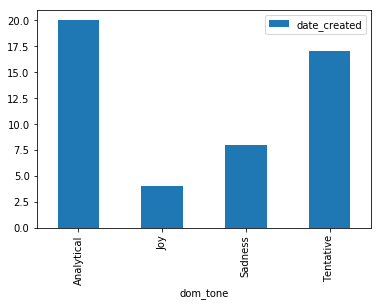

In [12]:
date_versus_tone.count().plot(kind='bar')

## Source Versus Tone Breakdown

In [19]:
count = 0
sources_list = []
for el in df.source:
    if df.source[count] not in sources_list:
        sources_list.append(df.source)
    else:
        continue
    count += count
#     df.source = df.source[count]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [17]:
df.source[0]

'ABC News'

In [18]:
df.sample(5)

,date_created,date_published,date_updated,description,dom_tone,id,image,source,title,url
25,2018-09-12,None,2018-09-12T13:59:05.188209+00:00,Leana Wen was an ER physician before she becam...,Analytical,31,https://media.npr.org/assets/img/2018/09/12/ge...,Npr.org,Planned Parenthood Chooses Baltimore's Health ...,https://www.npr.org/2018/09/12/647128716/plann...
15,2018-09-12,None,2018-09-12T11:43:21.421789+00:00,The family of Dallas police officer Amber Guye...,Tentative,16,http://a57.foxnews.com/media2.foxnews.com/Brig...,Fox News,Family of Dallas cop who fatally shot neighbor...,http://www.foxnews.com/us/2018/09/12/family-da...
34,2018-09-12,None,2018-09-12T13:59:05.188209+00:00,National security adviser John Bolton said cri...,Analytical,40,https://www.washingtonpost.com/resizer/f9FnoLR...,The Washington Post,Trump issues new order authorizing additional ...,https://www.washingtonpost.com/politics/trump-...
38,2018-09-12,None,2018-09-12T13:59:05.188209+00:00,Xavier Cunningham was trying to escape yellow ...,Sadness,44,https://www.washingtonpost.com/resizer/si8N1qZ...,The Washington Post,A 10-year-old fell face-first from a treehouse...,https://www.washingtonpost.com/health/2018/09/...
20,2018-09-12,None,2018-09-12T12:21:21.565995+00:00,"Teen use of e-cigarettes, including Juul and o...",Analytical,24,https://media2.s-nbcnews.com/j/newscms/2018_37...,NBC News,"E-cigarette use is an 'epidemic,' FDA chief says",https://www.nbcnews.com/health/health-news/e-c...


## Tone Breakdown- pie chart showing what percentage of an article is each tone.